In [18]:
# csv就是excel形式的数据
# python 自动化办公
import pandas as pd
# 可视化，软件，tableau（软件）
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

定量研究

In [3]:
data = pd.read_csv('./cancer.csv',sep = '\t')
data

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_max,symmetry_max,fractal_max
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# 数据挖掘：整理，X------------y
# 特征（微观：细胞核半径，直径，面积，光滑度，质地……）
X = data.iloc[:,2:]
# 目标值：M（恶性），B（良性）
y = data['Diagnosis']

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_test.shape

(114, 30)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_ = knn.predict(X_test)

# 准确率
print('-----手算',(y_ == y_test).mean())

print('-----自带',knn.score(X_test,y_test))

print('-----方法',accuracy_score(y_test,y_))

-----手算 0.9385964912280702
-----自带 0.9385964912280702
-----方法 0.9385964912280702


### 模型参数调整

------------------k = 20 0.9649122807017544


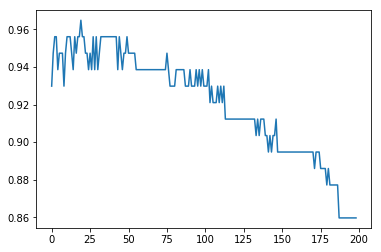

In [24]:
scores = []
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_ = knn.predict(X_test)
    # 准确率
    score = accuracy_score(y_test,y_)
    scores.append(score)
#     当k = 20时候，准确率最好
plt.plot(scores)
print('------------------k = 20',scores[19])

In [28]:

for i in range(1,10):
    for w in ['uniform','distance']:
        knn = KNeighborsClassifier(n_neighbors=i,weights=w,p = 2)
        knn.fit(X_train,y_train)
        print('邻居是：%d。权重是%s。准确率：'%(i,w),knn.score(X_test,y_test))

邻居是：1。权重是uniform。准确率： 0.9298245614035088
邻居是：1。权重是distance。准确率： 0.9298245614035088
邻居是：2。权重是uniform。准确率： 0.9473684210526315
邻居是：2。权重是distance。准确率： 0.9298245614035088
邻居是：3。权重是uniform。准确率： 0.956140350877193
邻居是：3。权重是distance。准确率： 0.956140350877193
邻居是：4。权重是uniform。准确率： 0.956140350877193
邻居是：4。权重是distance。准确率： 0.956140350877193
邻居是：5。权重是uniform。准确率： 0.9385964912280702
邻居是：5。权重是distance。准确率： 0.9385964912280702
邻居是：6。权重是uniform。准确率： 0.9473684210526315
邻居是：6。权重是distance。准确率： 0.9473684210526315
邻居是：7。权重是uniform。准确率： 0.9473684210526315
邻居是：7。权重是distance。准确率： 0.9473684210526315
邻居是：8。权重是uniform。准确率： 0.9473684210526315
邻居是：8。权重是distance。准确率： 0.9473684210526315
邻居是：9。权重是uniform。准确率： 0.9298245614035088
邻居是：9。权重是distance。准确率： 0.9385964912280702


In [29]:
for i in range(1,10):
    for w in ['uniform','distance']:
        knn = KNeighborsClassifier(n_neighbors=i,weights=w,p = 1)
        knn.fit(X_train,y_train)
        print('邻居是：%d。权重是%s。准确率：'%(i,w),knn.score(X_test,y_test))

邻居是：1。权重是uniform。准确率： 0.9385964912280702
邻居是：1。权重是distance。准确率： 0.9385964912280702
邻居是：2。权重是uniform。准确率： 0.9473684210526315
邻居是：2。权重是distance。准确率： 0.9385964912280702
邻居是：3。权重是uniform。准确率： 0.956140350877193
邻居是：3。权重是distance。准确率： 0.956140350877193
邻居是：4。权重是uniform。准确率： 0.9473684210526315
邻居是：4。权重是distance。准确率： 0.9473684210526315
邻居是：5。权重是uniform。准确率： 0.9473684210526315
邻居是：5。权重是distance。准确率： 0.9385964912280702
邻居是：6。权重是uniform。准确率： 0.9473684210526315
邻居是：6。权重是distance。准确率： 0.956140350877193
邻居是：7。权重是uniform。准确率： 0.9473684210526315
邻居是：7。权重是distance。准确率： 0.9385964912280702
邻居是：8。权重是uniform。准确率： 0.956140350877193
邻居是：8。权重是distance。准确率： 0.956140350877193
邻居是：9。权重是uniform。准确率： 0.9649122807017544
邻居是：9。权重是distance。准确率： 0.9473684210526315


### 数据清洗 特征工程

In [30]:
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_max,symmetry_max,fractal_max
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# 度量衡，不统一，单位不同的（nm，质地，光弧度）
# 归一化
# 最大值，最小值归一化
# Z-score归一化

$$\frac{X - X.min()}{X.max() - X.min()}$$

In [35]:
X2 = (X - X.min())/(X.max() - X.min())

In [40]:
import numpy as np

In [41]:
scores = []
for i in range(200):
    knn = KNeighborsClassifier()
    # 随机划分
    X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size = 0.2)

    knn.fit(X_train,y_train)

    scores.append(knn.score(X_test,y_test))
    
print('数据处理：最大值最小值归一化。准确率：',np.mean(scores))

数据处理：最大值最小值归一化。准确率： 0.9657017543859648


In [42]:
scores = []
for i in range(200):
    knn = KNeighborsClassifier()
    # 随机划分
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

    knn.fit(X_train,y_train)

    scores.append(knn.score(X_test,y_test))
    
print('数据没有进行处理。准确率：',np.mean(scores))

数据没有进行处理。准确率： 0.9290350877192982


In [44]:
scores = []
for i in range(200):
    knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
    # 随机划分
    X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size = 0.2)

    knn.fit(X_train,y_train)

    scores.append(knn.score(X_test,y_test))
    
print('数据处理：最大值最小值归一化。准确率：',np.mean(scores))

数据处理：最大值最小值归一化。准确率： 0.9677631578947367


$$\frac{X - X.mean()}{X.std()}$$

In [46]:
X3 = (X - X.mean())/X.std()

In [47]:
# 平均值是0，标准差是1，标准的正太分布
# 高斯分布
X3.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,symmetry_mean,fractal_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_max,symmetry_max,fractal_max
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.159355e-15,-6.549730e-15,-6.993039e-16,-8.553985e-16,6.068959e-15,-1.123881e-15,-3.121893e-16,1.023981e-15,-1.860648e-15,4.651620e-16,...,-2.297713e-15,1.735772e-15,-1.211294e-15,6.243785e-16,-5.082441e-15,-2.097912e-15,6.368661e-16,-1.998011e-16,-2.422589e-15,2.510002e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


In [48]:
X2.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,symmetry_mean,fractal_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_max,symmetry_max,fractal_max
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
scores = []
for i in range(200):
    knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
    # 随机划分
    X_train,X_test,y_train,y_test = train_test_split(X3,y,test_size = 0.2)

    knn.fit(X_train,y_train)

    scores.append(knn.score(X_test,y_test))
    
print('数据处理：Z-score归一化。准确率：',np.mean(scores))

数据处理：Z-score归一化。准确率： 0.9652631578947367


In [50]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,symmetry_mean,fractal_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_max,symmetry_max,fractal_max
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
